In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive, files
drive.mount('/content/gdrive/')
path = '/content/gdrive/My Drive/np_arrays/'
models_path = '/content/gdrive/My Drive/np_arrays/models/'
data_path = '/content/gdrive/My Drive/np_arrays/datasets/'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
batch_size = 32
num_classes = 2
epochs = 25
data_augmentation = True
num_predictions = 20

x_train = np.load(data_path + "trainset_horse2.npy")
y_train = np.load(data_path + "trainlabel_horse2.npy")
z_train = np.load(data_path + "traintype_horse2.npy") 

x_test = np.load(data_path + "testset_horse2.npy")
y_test = np.load(data_path + "testlabel_horse2.npy")
z_test = np.load(data_path + "testtype_horse2.npy")

[7]
ters


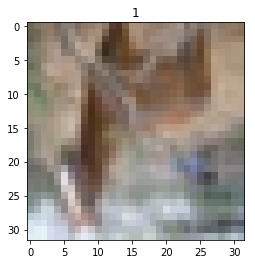

In [0]:
#Visualize image and label
i = 15
rgb = x_test[i] 
plt.imshow(rgb)
plt.title(int(y_test[i]))

print(z_test[i])

if (y_test[i] == 1):
  print("ters")
else:
  print("duz")

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30000, 32, 32, 3)
(30000,)
(6000, 32, 32, 3)
(6000,)


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(num_classes))
model.add(Dense(1))
model.add(Activation('sigmoid'))

opt = keras.optimizers.rmsprop(lr=0.01, decay=1e-6) #lr 0.0001 idi
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True
              )

Train on 30000 samples, validate on 6000 samples
Epoch 1/25
30000/30000 [==============================] - 642s 21ms/step - loss: 0.5377 - acc: 0.7025 - val_loss: 0.5654 - val_acc: 0.7342
Epoch 2/25
30000/30000 [==============================] - 649s 22ms/step - loss: 0.4731 - acc: 0.7537 - val_loss: 0.4435 - val_acc: 0.8083
Epoch 3/25
30000/30000 [==============================] - 652s 22ms/step - loss: 0.4365 - acc: 0.7800 - val_loss: 0.3702 - val_acc: 0.8428
Epoch 4/25
30000/30000 [==============================] - 651s 22ms/step - loss: 0.4119 - acc: 0.7980 - val_loss: 0.3520 - val_acc: 0.8503
Epoch 5/25
30000/30000 [==============================] - 654s 22ms/step - loss: 0.3852 - acc: 0.8139 - val_loss: 0.3414 - val_acc: 0.8595
Epoch 6/25
30000/30000 [==============================] - 656s 22ms/step - loss: 0.3650 - acc: 0.8249 - val_loss: 0.3335 - val_acc: 0.8647
Epoch 7/25
30000/30000 [==============================] - 654s 22ms/step - loss: 0.3425 - acc: 0.8388 - val_loss: 0.3

In [0]:
import h5py
model.save(models_path + "cifar10_horse2v2.h5") #saves the trained model